In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings

#### Read the dataset

In [2]:
df = pd.read_csv("Data_Flight.csv")
df.head()

,Unnamed: 0,Airline,Date,Source,Destination,Departure Time,Arrival Time,Flight Duration,Price,Stops
0,0,Air Asia,04-May,New Delhi,Mumbai,13:00,14:50,1h 50m,"7,319",Non Stop
1,1,IndiGo,04-May,New Delhi,Mumbai,11:55,13:55,2h 00m,"7,319",Non Stop
2,2,IndiGo,04-May,New Delhi,Mumbai,10:45,12:50,2h 05m,"7,319",Non Stop
3,3,IndiGo,04-May,New Delhi,Mumbai,17:00,19:05,2h 05m,"7,319",Non Stop
4,4,IndiGo,04-May,New Delhi,Mumbai,23:35,01:40\n+ 1 day,2h 05m,"7,319",Non Stop


In [3]:
 df.shape

(1715, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1715 non-null   int64 
 1   Airline          1715 non-null   object
 2   Date             1715 non-null   object
 3   Source           1715 non-null   object
 4   Destination      1715 non-null   object
 5   Departure Time   1715 non-null   object
 6   Arrival Time     1715 non-null   object
 7   Flight Duration  1715 non-null   object
 8   Price            1715 non-null   object
 9   Stops            1715 non-null   object
dtypes: int64(1), object(9)
memory usage: 134.1+ KB


### Data Preprocessing


#### 1) Handling Null Values

In [9]:
df.isnull().sum()

Unnamed: 0         0
Airline            0
Date               0
Source             0
Destination        0
Departure Time     0
Arrival Time       0
Flight Duration    0
Price              0
Stops              0
dtype: int64

#### 2) Handling duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Date', 'Source', 'Destination',
       'Departure Time', 'Arrival Time', 'Flight Duration', 'Price', 'Stops'],
      dtype='object')

#### Droping the unnamed column as it is just present as an index

In [12]:
df.drop(columns='Unnamed: 0',inplace=True)

In [13]:
df.columns

Index(['Airline', 'Date', 'Source', 'Destination', 'Departure Time',
       'Arrival Time', 'Flight Duration', 'Price', 'Stops'],
      dtype='object')

 ### Exploratory Data Analysis

In [14]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Airline', 'Date', 'Source', 'Destination', 'Departure Time',
       'Arrival Time', 'Flight Duration', 'Price', 'Stops'],
      dtype='object')
Index([], dtype='object')


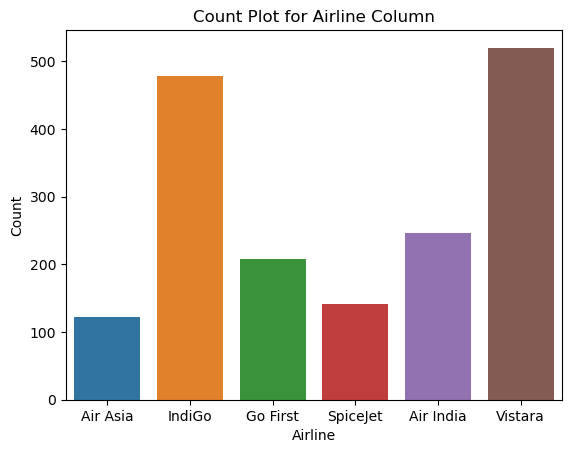

In [15]:
sns.countplot(x='Airline', data=df)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Count Plot for Airline Column')
plt.show()

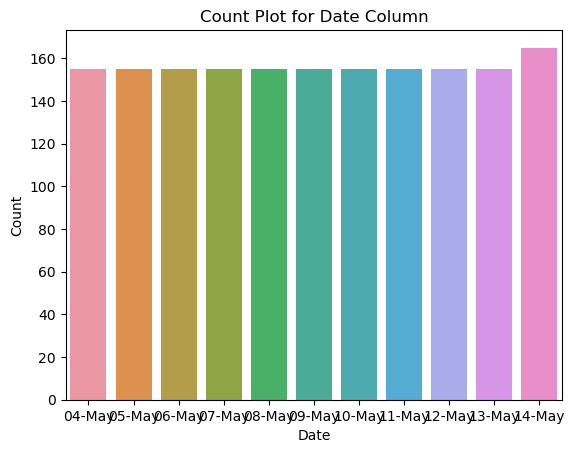

In [16]:
sns.countplot(x='Date', data=df)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Plot for Date Column')
plt.show()

#### Extracting month,day,arrival and departure hour and minute

In [17]:
df['Day'] = pd.to_datetime(df['Date'], format='%d-%b').map(lambda x: x.day)
df['Month'] = pd.to_datetime(df['Date'], format='%d-%b').map(lambda x: x.month)

In [18]:
df.drop(columns='Date',inplace=True)

In [19]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Departure Time', 'Arrival Time',
       'Flight Duration', 'Price', 'Stops', 'Day', 'Month'],
      dtype='object')

In [20]:
df['Source'].value_counts()

New Delhi    1715
Name: Source, dtype: int64

In [21]:
df['Destination'].value_counts()

Mumbai    1715
Name: Destination, dtype: int64

In [22]:
df['Departure Time'].value_counts()

14:45    52
12:50    46
17:35    43
7:20     42
20:35    40
         ..
16:55     1
19:30     1
8:15      1
12:35     1
17:25     1
Name: Departure Time, Length: 128, dtype: int64

In [23]:
df['D_Hour'] = pd.to_datetime(df['Departure Time'], format='%H:%M').map(lambda x: x.hour)
df['D_Min'] = pd.to_datetime(df['Departure Time'], format='%H:%M').map(lambda x: x.minute)

In [24]:
df.drop(columns='Departure Time',inplace=True)

In [25]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Arrival Time', 'Flight Duration',
       'Price', 'Stops', 'Day', 'Month', 'D_Hour', 'D_Min'],
      dtype='object')

In [26]:
df['Flight Duration'].value_counts()

2h 10m     187
2h 15m     161
2h 05m      74
2h 20m      74
7h 15m      35
          ... 
22h 50m      1
14h 50m      1
4h 50m       1
15h 20m      1
17h 50m      1
Name: Flight Duration, Length: 148, dtype: int64

In [27]:
df['Arrival Time'].value_counts()

10:00\n+ 1 day    44
08:40\n+ 1 day    44
19:15             28
20:45             28
14:30\n+ 1 day    27
                  ..
00:25\n+ 1 day     1
13:25              1
18:15              1
14:45              1
11:00\n+ 1 day     1
Name: Arrival Time, Length: 160, dtype: int64

In [28]:
df['Arrival Time'] = df['Arrival Time'].map(lambda x: x.split('\n')[0])

In [29]:
df['A_Hour'] = pd.to_datetime(df['Arrival Time'], format='%H:%M').map(lambda x: x.hour)
df['A_Min'] = pd.to_datetime(df['Arrival Time'], format='%H:%M').map(lambda x: x.minute)

In [30]:
df.drop(columns='Arrival Time',inplace=True)

In [31]:
df['Flight Duration'].value_counts()

2h 10m     187
2h 15m     161
2h 05m      74
2h 20m      74
7h 15m      35
          ... 
22h 50m      1
14h 50m      1
4h 50m       1
15h 20m      1
17h 50m      1
Name: Flight Duration, Length: 148, dtype: int64

In [32]:
df['Flight Duration'] = df['Flight Duration'].map(lambda x: int(x.split('h')[0])*60 + int(x.split('h')[1][:-1]))

C:\Users\Hp\AppData\Local\Temp\ipykernel_6064\2084469828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight Duration'])


<Axes: xlabel='Flight Duration', ylabel='Density'>

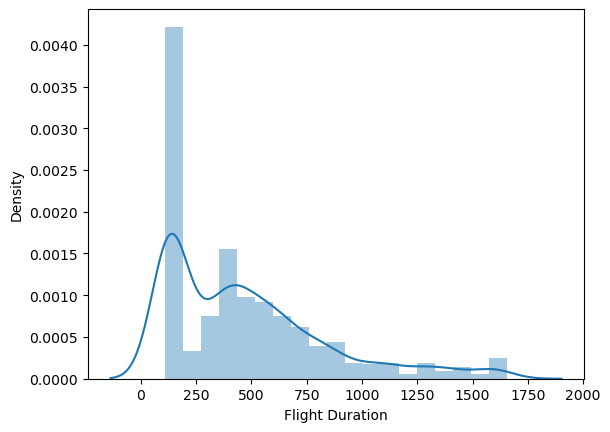

In [34]:
sns.distplot(df['Flight Duration'])

In [35]:
df['Stops'].value_counts()

1 Stop       1111
Non Stop      579
2 Stop(s)      25
Name: Stops, dtype: int64

In [36]:
df['Stops'] = df['Stops'].map(lambda x: x.split('Stop')[0])
df['Stops'] = df['Stops'].replace('Non ',0)
df['Stops'] = df['Stops'].astype(int)

In [37]:
df['Stops'].value_counts()

1    1111
0     579
2      25
Name: Stops, dtype: int64

In [38]:
df['Price'].value_counts()

7,319     412
7,320     169
12,045    101
8,371      61
10,889     58
         ... 
13,252      1
13,042      1
12,517      1
16,560      1
16,632      1
Name: Price, Length: 233, dtype: int64

In [39]:
df['Price'] = df['Price'].map(lambda x: int(x.replace(',','')))

C:\Users\Hp\AppData\Local\Temp\ipykernel_6064\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

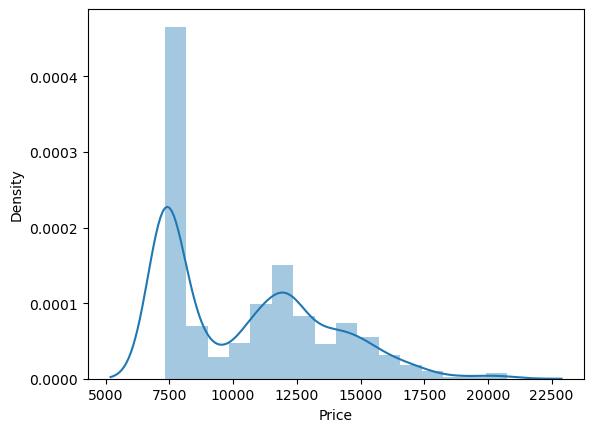

In [40]:
sns.distplot(df['Price'])

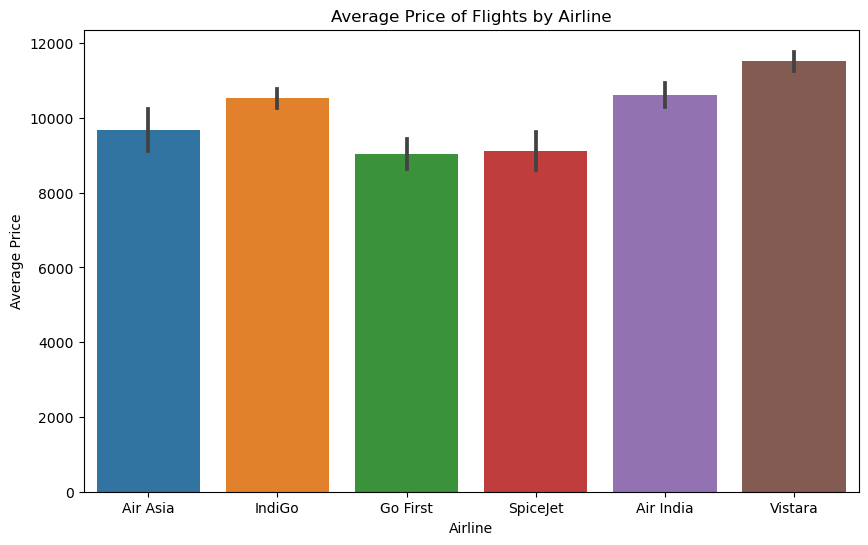

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

We here see that on an average 'Go First' flights are cheaper followed by 'SpiceJet'

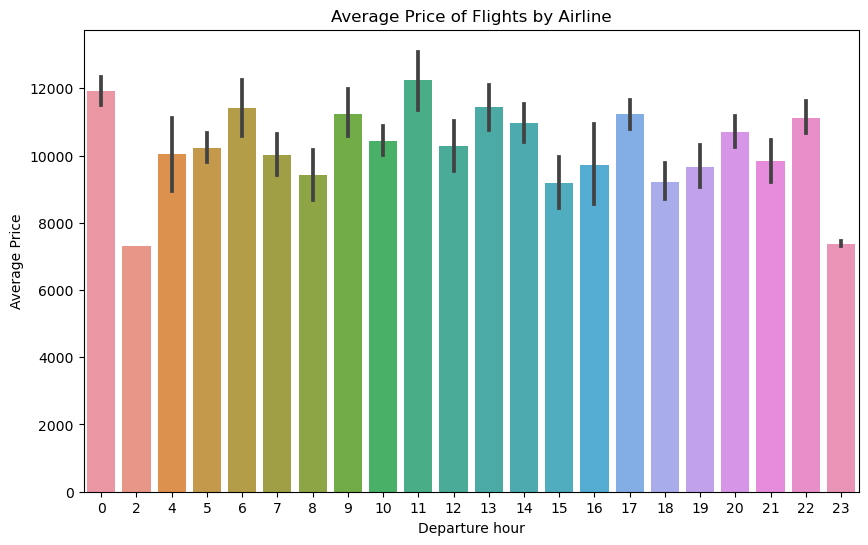

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='D_Hour', y='Price', data=df)
plt.title('Average Price of Flights by departure hour')
plt.xlabel('Departure hour')
plt.ylabel('Average Price')
plt.show()

from this data we see that flight with departure around midnight is the cheapest

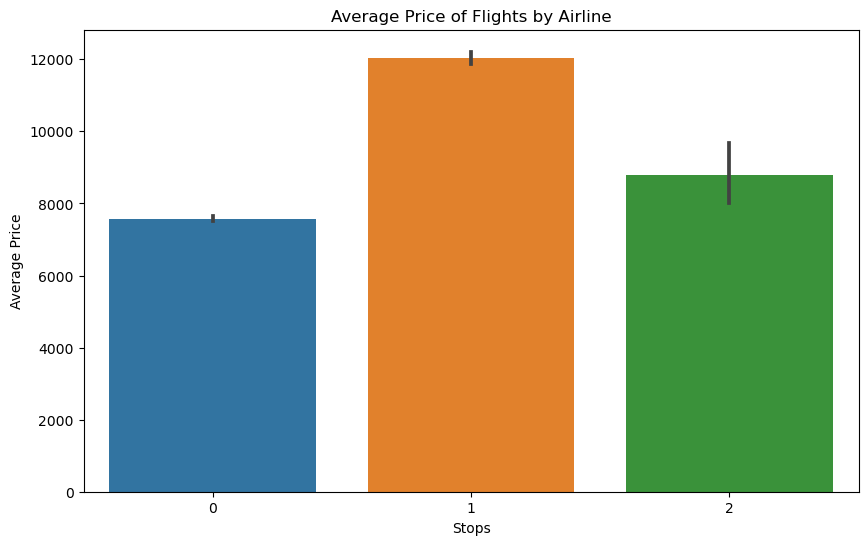

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stops', y='Price', data=df)
plt.title('Average Price of Flights by Airline')
plt.xlabel('Stops')
plt.ylabel('Average Price')
plt.show()

non Stop flights are more cheaper


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])

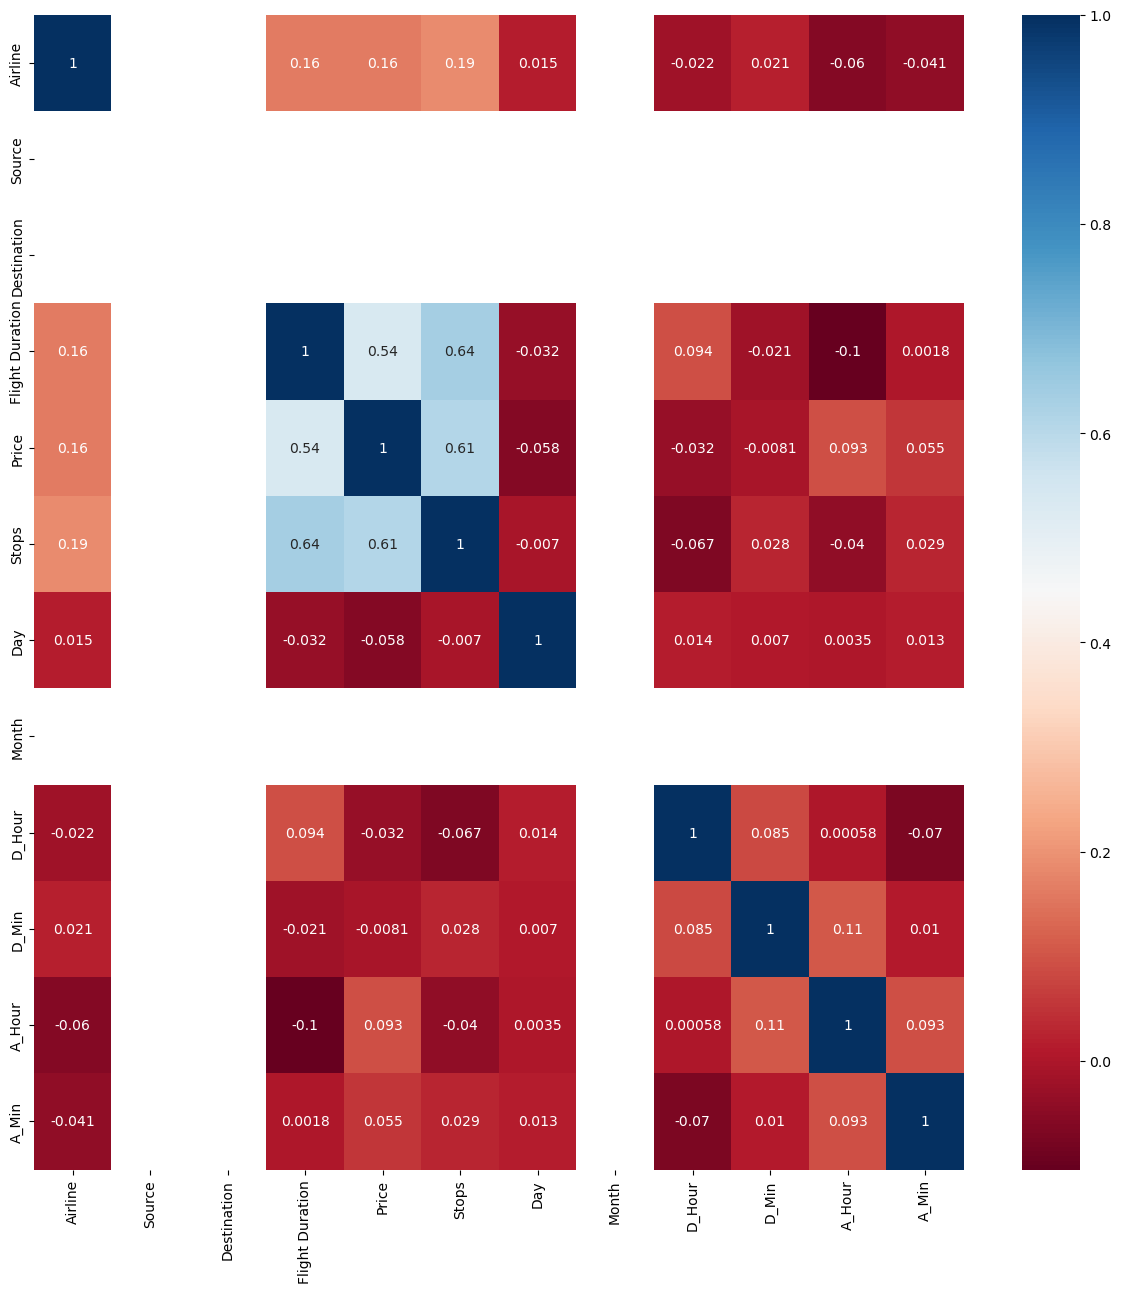

In [51]:
corr = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


Stops , Airline and Flight Duration are highly positively correlated.   
Source ,Month and Destination doesnt affect 

In [52]:
df.drop(columns=['Source','Destination','Month'],inplace=True)

In [53]:
df['Price'].describe(percentiles=[0.01,0.02,0.03,0.05,0.75,0.95,0.97,0.98,0.99])

count     1715.000000
mean     10481.794169
std       3143.484340
min       7319.000000
1%        7319.000000
2%        7319.000000
3%        7319.000000
5%        7319.000000
50%      10364.000000
75%      12570.000000
95%      15930.000000
97%      16875.000000
98%      17283.600000
99%      18413.320000
max      20760.000000
Name: Price, dtype: float64

In [54]:
print(df[df['Price']>18413.320000].shape)

(18, 9)


In [55]:
df = df[df['Price']<=18413.320000]
df.shape

(1697, 9)

In [56]:
df.columns

Index(['Airline', 'Flight Duration', 'Price', 'Stops', 'Day', 'D_Hour',
       'D_Min', 'A_Hour', 'A_Min'],
      dtype='object')

In [58]:
x = df.drop(columns='Price')
y = df['Price']

#### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler


In [61]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### Split data into test train

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1187, 8)
(510, 8)
(1187,)
(510,)


### LInear Regression

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [67]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.4414572009366121
Test Score 0.4637865420844809


In [68]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [69]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 1634.6775017933173
MSE 4867034.829146416
RMSE 2206.1357231925726
R2 Score 0.4637865420844809


#### KNN Regressor


In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("R2 score: \t", r2_score(y_test,pred))
print("MSE : \t", mean_squared_error(y_test,pred))
print("RMSE : \t", np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 	 0.5523126994528282
MSE : 	 4063511.7454901957
RMSE : 	 2015.815404616751


#### Random Forest Regressor


In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("R2 score: \t", r2_score(y_test,pred))
print("MSE : \t", mean_squared_error(y_test,pred))
print("RMSE : \t", np.sqrt(mean_squared_error(y_test,pred)))

R2 score: 	 0.7866656382221753
MSE : 	 1936366.485583398
RMSE : 	 1391.5338607390759


#### Decision Tree Regressor


In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("R2 Score: \t", r2_score(y_test,pred))
print("MSE : \t", mean_squared_error(y_test,pred))
print("RMSE : \t", np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 	 0.6604726881085792
MSE : 	 3081778.7730392157
RMSE : 	 1755.4995793332494


#### Random Forest has high value of R2 score